Definitionen:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def NewtonCoeff(x, y):
    n = len(x) - 1
    Y = np.zeros((n+1,n+1))
    Y[:,0] = y
  
    for k in range(1, n+1):
        for l in range(0, n-k+1):
            Y[l,k] = (Y[l+1,k-1] - Y[l,k-1]) / (x[l+k] - x[l])  
            
    return Y[0,:]

def evalNewtonCoeff(c, x, z):
  num_points = len(z)
  n = len(x)-1
  p = np.full(num_points, c[n])

  for i in range(1, n+1):
    p *= (z - x[n-i])
    p += c[n-i]
      
  return p

Aufgabe 1)

a)


In [2]:
def computeTschebyscheff(a,b,n):
    x = np.zeros(n+1)
    for i in range(n+1):
        xi = (a+b)/2+(b-a)/2*(math.cos(((2*i+1)*math.pi)/(2*n+2)))
        x[i] = xi
    return(x)

x = computeTschebyscheff(-1,1,4)
for i in range(len(x)):
    print(round(x[i],3))

0.951
0.588
0.0
-0.588
-0.951


b)

Die Lagrange Interpolation besteht aus folgender Formel:
$p(z) = \sum_{i=0}^{n} y_{i} \prod_{j=0, j \neq i}^{n} \frac{z-xj}{xi-xj}$

In unserem falle der linearen Interpolation würde dies folgend aussehen:
$p(z) = y_{0} * \frac {z-x_{1}}{x_{0}-x_{1}}+ y_{1} * \frac {z-x_{0}}{x_{1}-x_{0}}$


In [3]:
def linInterpolation(x1,y1,x2,y2,z):
    pz = y1*((z-x2)/(x1-x2))+y2*((z-x1)/(x2-x1)) #Auswertung von z nach Formel oben
    return pz

def evalLinear(x,y,z):
    x_y_index=0 #Index innerhalb welchen Intervalls [xi,xi+1] wir uns befinden
    output = np.zeros(len(z))
    for i in range(len(z)):
        if(z[i]>x[x_y_index+1]): #Wenn z größer als nächstes x => wir sind im nächsten intervall
            x_y_index+=1

        pz = linInterpolation(x[x_y_index],y[x_y_index],x[x_y_index+1],y[x_y_index+1],z[i])
        output[i]=pz
    return output
        

x = np.array([0,1,2,3])
y = np.array([0,1,4,9])
z = np.array([0,0.5,1,1.5,2,2.5,3])
p = evalLinear(x,y,z)
print(p)

[0.  0.5 1.  2.5 4.  6.5 9. ]


c)
Funktion: $f(x)=\frac{1}{1+5x^{2}}$

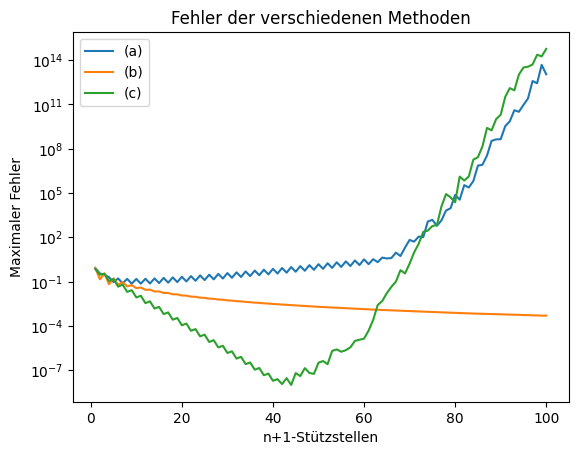

In [4]:
def f(x):
    return 1/(1+5*(x**2))

z=np.linspace(-1,1,500)
err_a = np.zeros(100)
err_b =np.zeros(100)
err_c = np.zeros(100)

for n in range(1,101):
    #Stützstellen
    x=np.zeros(n+1) #äquidistant
    y=np.zeros(n+1)
    y_c=np.zeros(n+1)
    x_c=computeTschebyscheff(-1,1,n) #tschebyscheff
    for i in range(n+1):
        x[i]=-1+((2*i)/n) #äquidistant
        y[i]=f(x[i]) #äquidistant
        y_c[i]=f(x_c[i]) #tschebyscheff

    pb=evalLinear(x,y,z) #(b)

    bCoeff=NewtonCoeff(x,y) #Newton Coeff von äquidistanten Sützstellen
    pa=evalNewtonCoeff(bCoeff,x,z) #(a)

    cCoeff=NewtonCoeff(x_c,y_c)
    pc = evalNewtonCoeff(cCoeff,x_c,z) #(c)

    #Berechne einzelne Fehler und speichere max in entsprechenden Arrays
    accValue = np.zeros(500)
    for l in range(500):
        accValue[l]=f(z[l])

    err_a[n-1]=np.max(np.abs(accValue-pa))
    err_b[n-1]=np.max(np.abs(accValue-pb))
    err_c[n-1]=np.max(np.abs(accValue-pc))
        

plt.title("Fehler der verschiedenen Methoden")
plt.yscale('log')
plt.xlabel('n+1-Stützstellen')
plt.ylabel('Maximaler Fehler')
plt.plot(range(1,101),err_a,label="(a)")
plt.plot(range(1,101),err_b,label="(b)")
plt.plot(range(1,101),err_c,label="(c)")
plt.legend()
plt.show()

In [ ]:
#komplett richtig 6P